# Time-Series Analysis: Consumer Price Index for all Urban Consumers

**U.S. City average CPI, Medical care (U.S. Bureau of Labor Statistics)**

## This script contains the following:
### 1. Importing libraries and data
### 2. Data Preparation
### 3. Line Chart of CPI-U from Jan-2000 to May-2023
### 4. Time-series analysis: decomposition
### 5. Testing for stationarity
### 6. Stationarizing the Data

## 1. Importing libraries and data


In [79]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

# Use 'fivethirtyeight' styles
plt.style.use('fivethirtyeight')

Import data downloaded from U.S. Bureau of Statistics

In [2]:
# Turn project folder path into a string
path = r'/Users/peterreadman/Desktop/Python Projects/PortfolioProjects/HealthcareSpending/'

In [47]:
# import data

df_orig = pd.read_csv(os.path.join(path,'02 Data','02a Original Data','CPI-U_US_city average Medical care.csv'))

### 2. Prepare the Data for Time-Series Analysis

In [48]:
df_orig.head()

,Date,Value,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185
0,2000-01-01,255.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-01,258.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,258.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-05-01,259.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df = df_orig[['Date', 'Value']].copy()
df.head()

,Date,Value
0,2000-01-01,255.5
1,2000-02-01,257.0
2,2000-03-01,258.1
3,2000-04-01,258.8
4,2000-05-01,259.4


In [50]:
df.shape

(281, 2)

In [51]:
df.columns

Index(['Date', 'Value'], dtype='object')

In [52]:
# Set the "Date" column as the index

from datetime import datetime

df['datetime'] = pd.to_datetime(df['Date']) # Create a datetime column from "Date.""
df = df.set_index('datetime') # Set the datetime as the index of the dataframe.
df.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df.head()

,Value
datetime,
2000-01-01,255.5
2000-02-01,257.0
2000-03-01,258.1
2000-04-01,258.8
2000-05-01,259.4


In [53]:
df.dtypes

Value    float64
dtype: object

## 3. Line Chart of CPI-U from Jan-2000 to May-2023


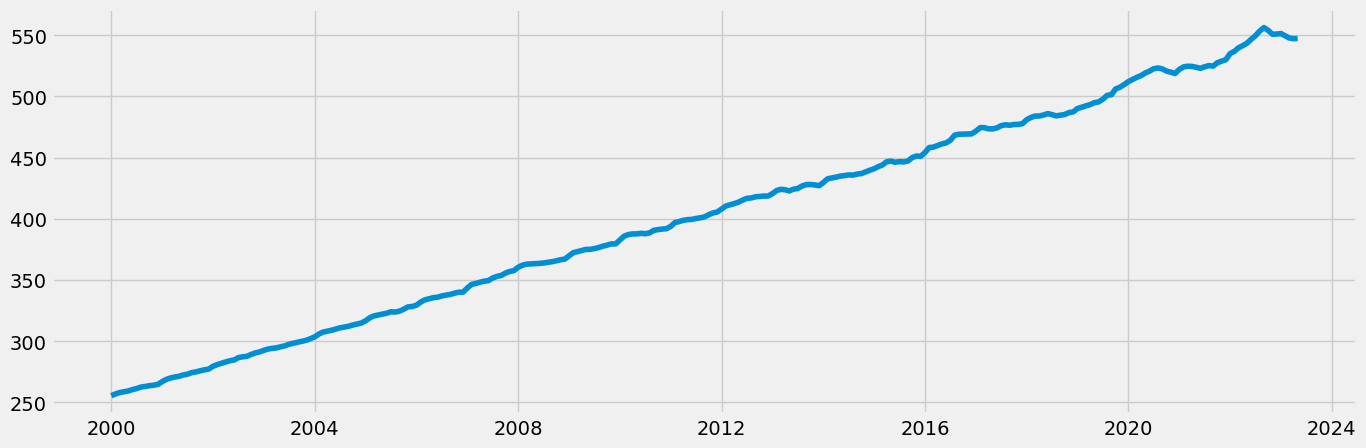

In [54]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

In [55]:
# Check for missing values

df.isnull().sum() 

Value    0
dtype: int64

In [57]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

# No dups!

1

In [58]:
# Reveal the duplicate

dups = df.duplicated()
duplicate_rows = df[dups]
print(duplicate_rows)

            Value
datetime         
2006-12-01  340.1


November and December in 2006 have the same CPI amount recorded (340.1). Leave duplicate in place.

## 4. Time-series analysis: decomposition

In [59]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [60]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

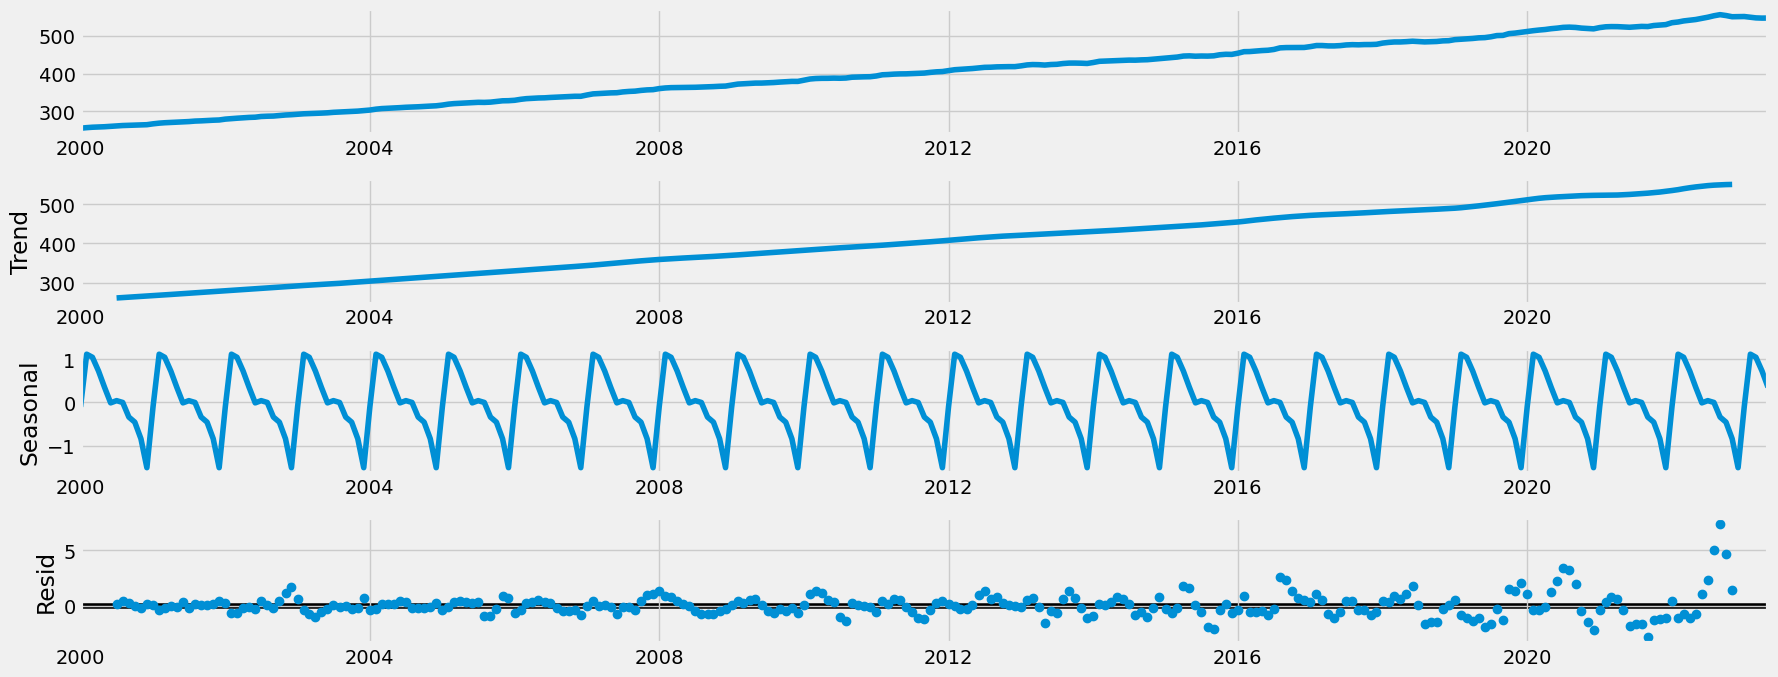

In [61]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Analysis of decomposition

- the trend is that average medical expenditure per city in the US has been increasing year on year since at least the year 2000.
- the seasonality is ... 
- the noise is ...

## 5. Testing for stationarity

In [62]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.243781
p-value                          0.974613
Number of Lags Used             14.000000
Number of Observations Used    266.000000
Critical Value (1%)             -3.455175
Critical Value (5%)             -2.872468
Critical Value (10%)            -2.572593
dtype: float64


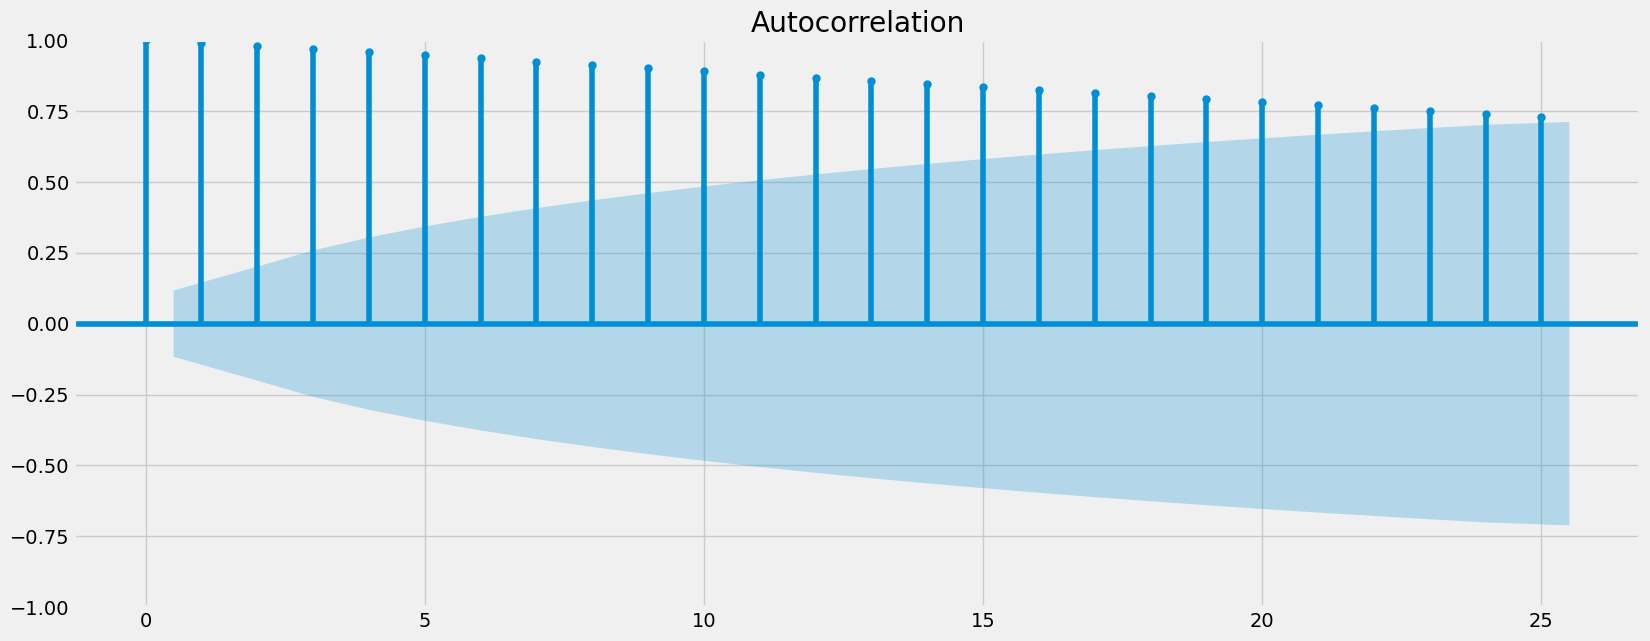

In [63]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

#### Test Statistic
The test statistic value is 0.243781. In this case, the test statistic is positive and relatively small. It is compared against the critical values to determine the stationarity of the series.

#### p-value
The p-value is 0.974613, which is close to 1. A high p-value suggests weak evidence against the null hypothesis (non-stationarity). In this case, the p-value is quite large, indicating that there is insufficient evidence to reject the null hypothesis.

#### Critical Values
The critical values at different significance levels (1%, 5%, and 10%) are provided. These values are used to compare against the test statistic. If the test statistic is greater than the critical value, it suggests non-stationarity at that significance level.

#### Conclusion: series is likely non-stationary
Based on the test statistic and p-value, along with comparison to the critical values, it appears that there is insufficient evidence to reject the null hypothesis of non-stationarity. The positive test statistic and high p-value indicate that the series is likely non-stationary.

## 6. Stationarizing the Data

In [65]:
data_diff = df - df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [66]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [67]:
data_diff.head()

,Value
datetime,
2000-02-01,1.5
2000-03-01,1.1
2000-04-01,0.7
2000-05-01,0.6
2000-06-01,1.1


In [68]:
data_diff.columns

Index(['Value'], dtype='object')

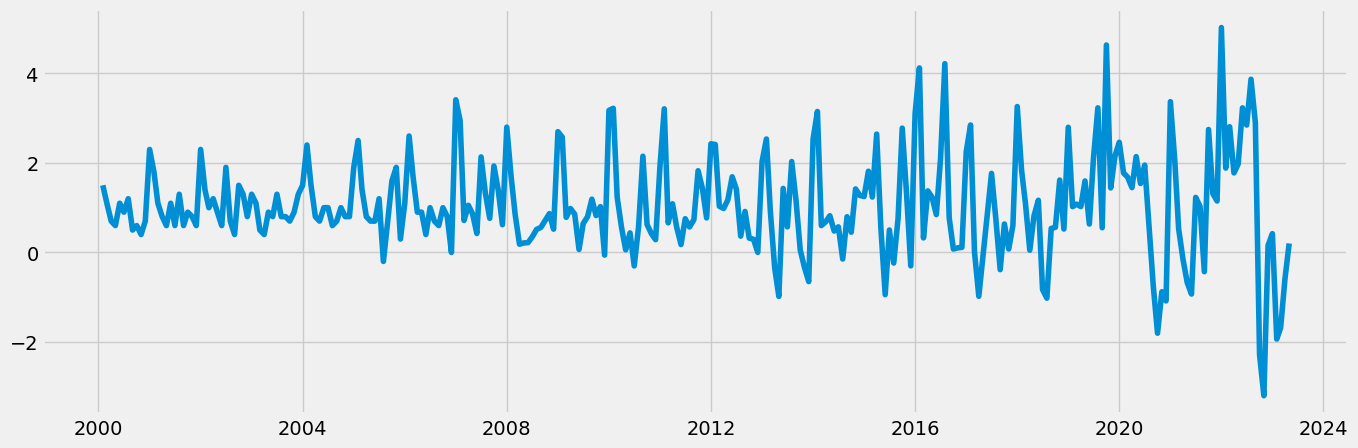

In [69]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [70]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.305520e+00
p-value                        3.331013e-08
Number of Lags Used            1.300000e+01
Number of Observations Used    2.660000e+02
Critical Value (1%)           -3.455175e+00
Critical Value (5%)           -2.872468e+00
Critical Value (10%)          -2.572593e+00
dtype: float64


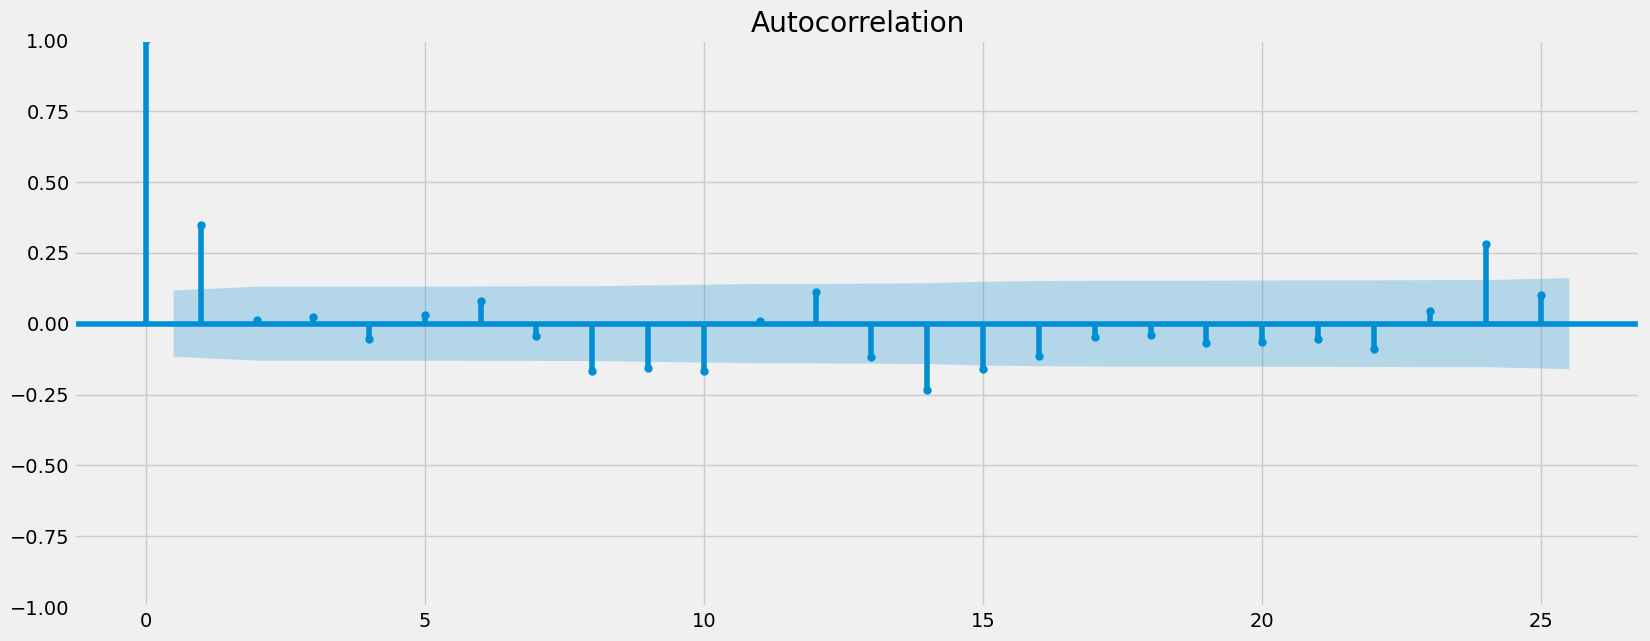

In [71]:
plot_acf(data_diff)
plt.show()

### Differencing: take 2

In [72]:
data_diff_2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [73]:
data_diff_2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [74]:
data_diff_2.head()

,Value
datetime,
2000-03-01,-0.4
2000-04-01,-0.4
2000-05-01,-0.1
2000-06-01,0.5
2000-07-01,-0.2


In [75]:
data_diff_2.columns

Index(['Value'], dtype='object')

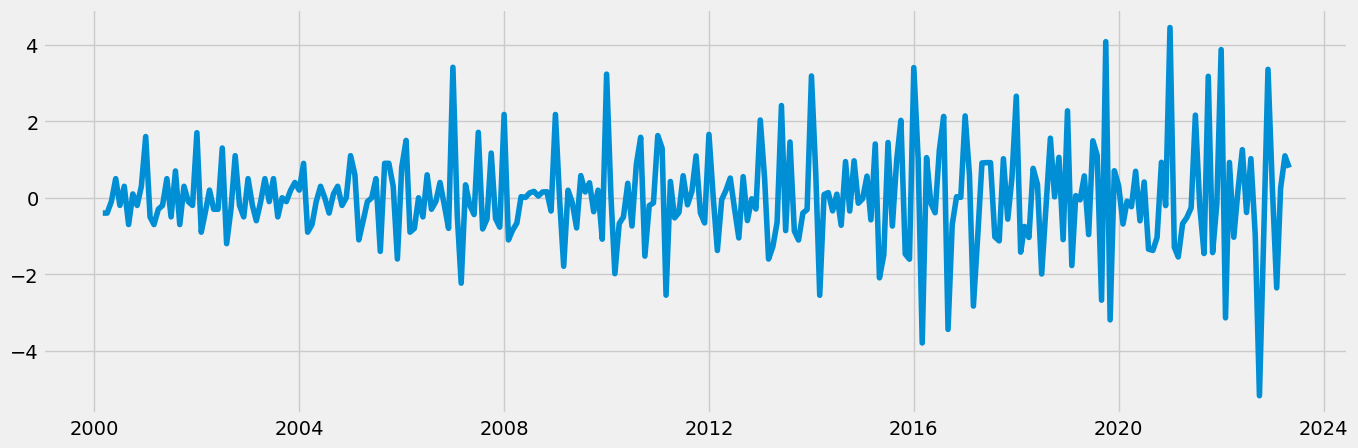

In [76]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [77]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -6.775836e+00
p-value                        2.572231e-09
Number of Lags Used            1.100000e+01
Number of Observations Used    2.670000e+02
Critical Value (1%)           -3.455081e+00
Critical Value (5%)           -2.872427e+00
Critical Value (10%)          -2.572571e+00
dtype: float64


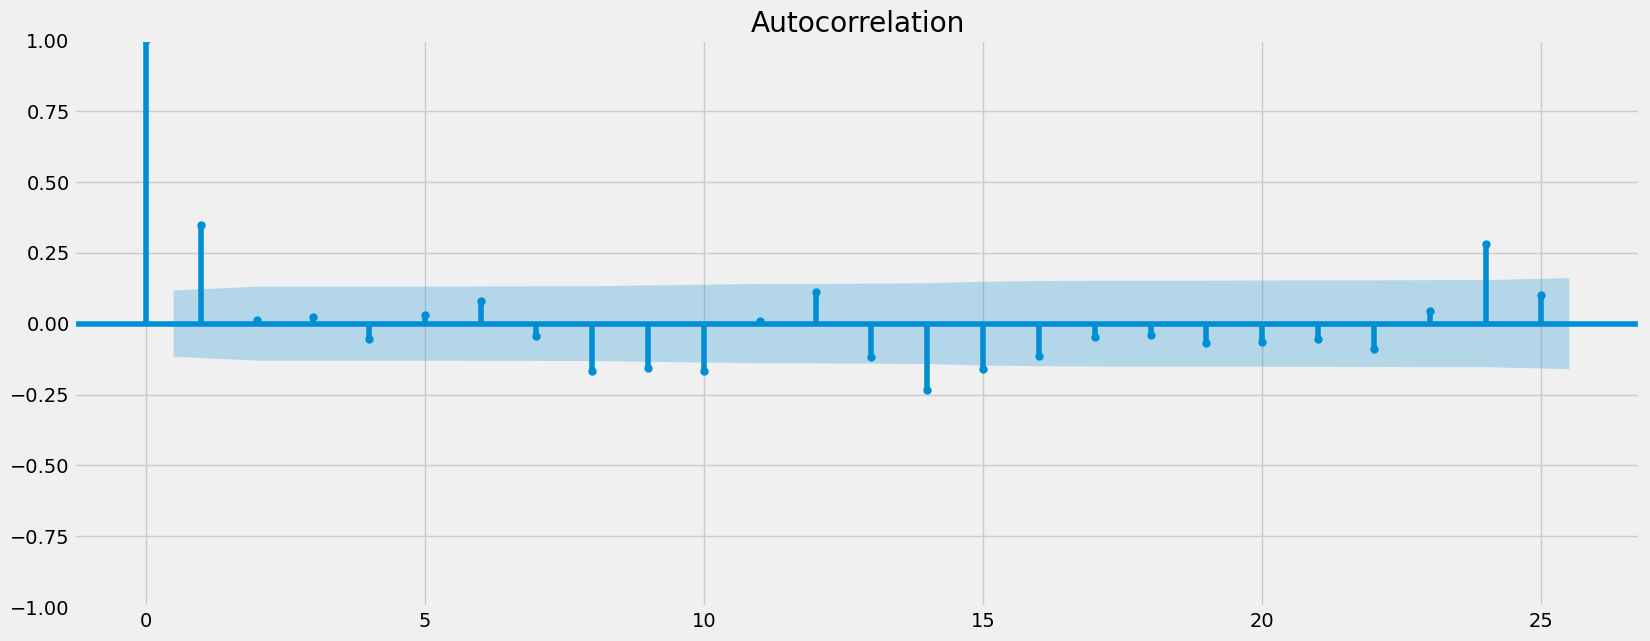

In [78]:
plot_acf(data_diff)
plt.show()

### Results after a second round of differencing
#### Test Statistic:
The test statistic value is -6.775836e+00. This value is highly negative, indicating strong evidence against the null hypothesis (non-stationarity). The more negative the test statistic, the stronger the evidence for rejecting the null hypothesis.

#### p-value:
The p-value is 2.572231e-09, which is very small. A small p-value suggests strong evidence against the null hypothesis. In this case, the small p-value indicates that the series is likely stationary.

#### Critical Values:
The critical values at different significance levels (1%, 5%, and 10%) are provided. These values are used to compare against the test statistic. If the test statistic is less than the critical value, it provides evidence to reject the null hypothesis (non-stationarity) at that significance level.

#### Result: series is likely stationary
Based on the test statistic, p-value, and comparison with the critical values, it appears that the series is likely stationary. The strong evidence against the null hypothesis suggests that there is no unit root (non-stationarity) in the series.